# Prediction of Sales: Classification with Random Forest

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time

import warnings
warnings.filterwarnings('ignore')

print ("Importing libraries has been sucessful")

Importing libraries has been sucessful


In [2]:
st = time.time()

## Loading the dataset

In [3]:
data = pd.read_csv("Company_Data.csv")

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


## Preliminary data exploration

In [6]:
data.shape

(400, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Null values in the dataset

In [8]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Duplicate values in the dataset

In [9]:
data.duplicated().sum()

0

### Outliers in the dataset

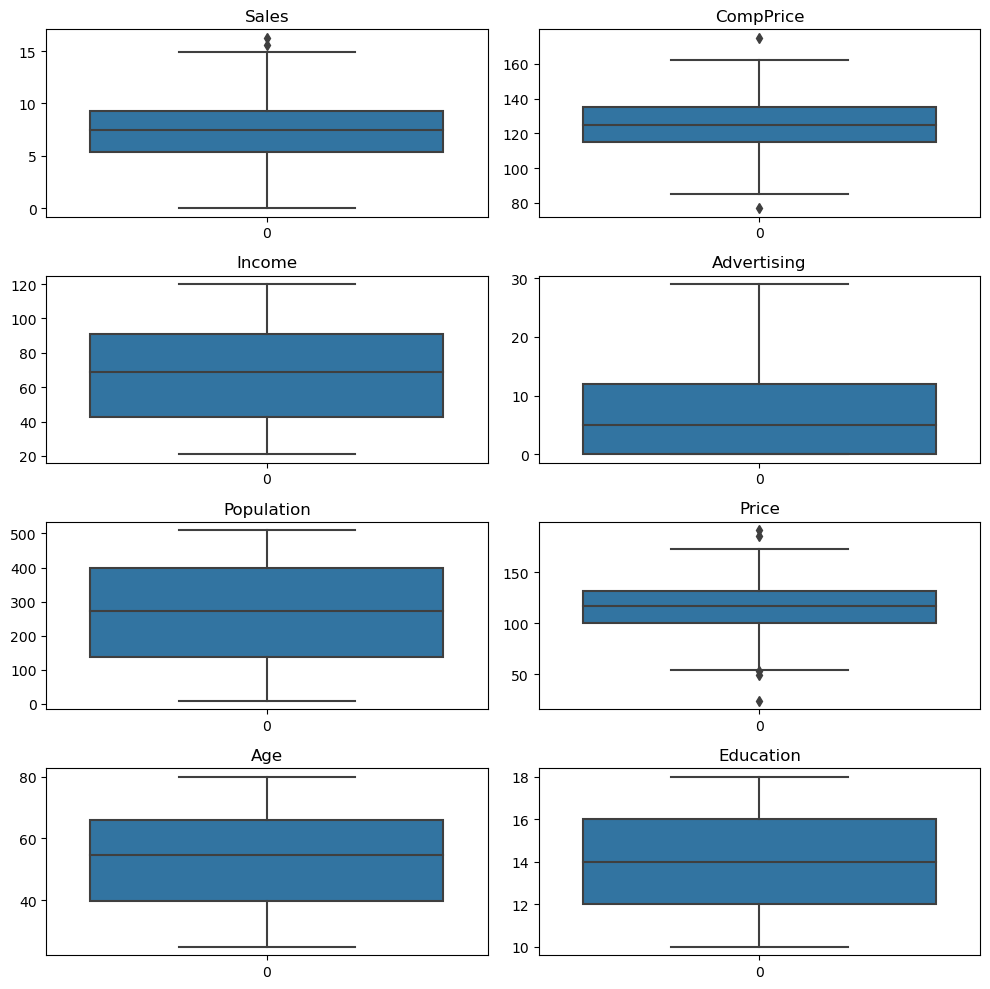

In [10]:
plt.figure(figsize = (10,10))

fig1 = plt.subplot(4,2,1)
sns.boxplot(data = data['Sales'])
plt.title("Sales")

fig2 = plt.subplot(4,2,2)
sns.boxplot(data = data['CompPrice'])
plt.title("CompPrice")

fig2 = plt.subplot(4,2,3)
sns.boxplot(data = data['Income'])
plt.title("Income")

fig4 = plt.subplot(4,2,4)
sns.boxplot(data = data['Advertising'])
plt.title("Advertising")


fig5 = plt.subplot(4,2,5)
sns.boxplot(data = data['Population'])
plt.title("Population")

fig6 = plt.subplot(4,2,6)
sns.boxplot(data = data['Price'])
plt.title("Price")

fig7 = plt.subplot(4,2,7)
sns.boxplot(data = data['Age'])
plt.title("Age")

fig8 = plt.subplot(4,2,8)
sns.boxplot(data = data['Education'])

plt.title("Education")

plt.tight_layout()
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 9/Box plots.jpg")
plt.show()

## Exploratory data analysis

In [11]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Distribution of Price and Competitor price

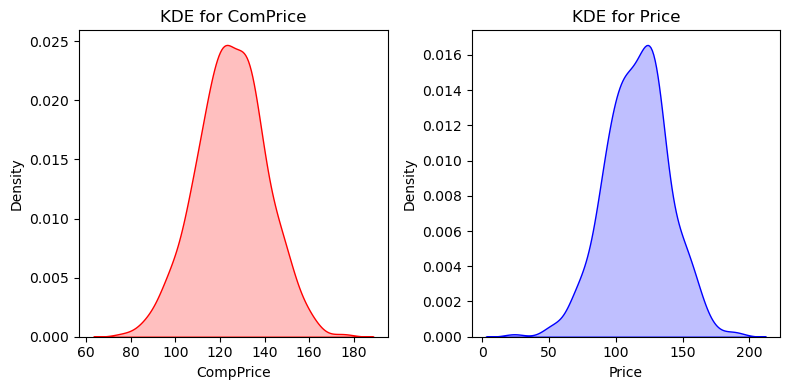

In [12]:
plt.figure (figsize = (8,4))
fig1 = plt.subplot(1,2,1)
sns.kdeplot(data = data, x = 'CompPrice', fill = True, color = 'red')
plt.title('KDE for ComPrice')

fig2 = plt.subplot(1,2,2)
sns.kdeplot(data = data, x = 'Price', fill = True, color = 'blue')
plt.title('KDE for Price')

plt.tight_layout()
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 9/KDE Plots.jpg")
plt.show()

### Influence of sales on Location (Urban or Rural)

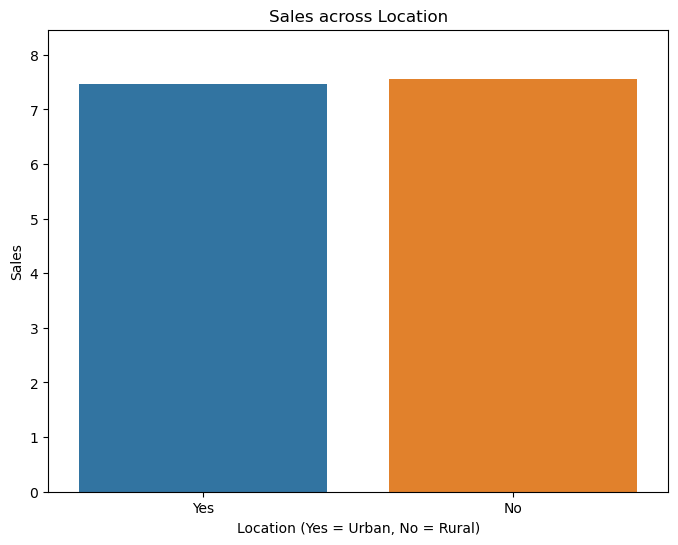

In [13]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Urban', y = 'Sales', errwidth = 0)
plt.xlabel('Location (Yes = Urban, No = Rural)')
plt.ylabel('Sales')
plt.title("Sales across Location")
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 9/Sales by Urban.jpg")
plt.show()

### Influence of Shelves Location on Price and Sales

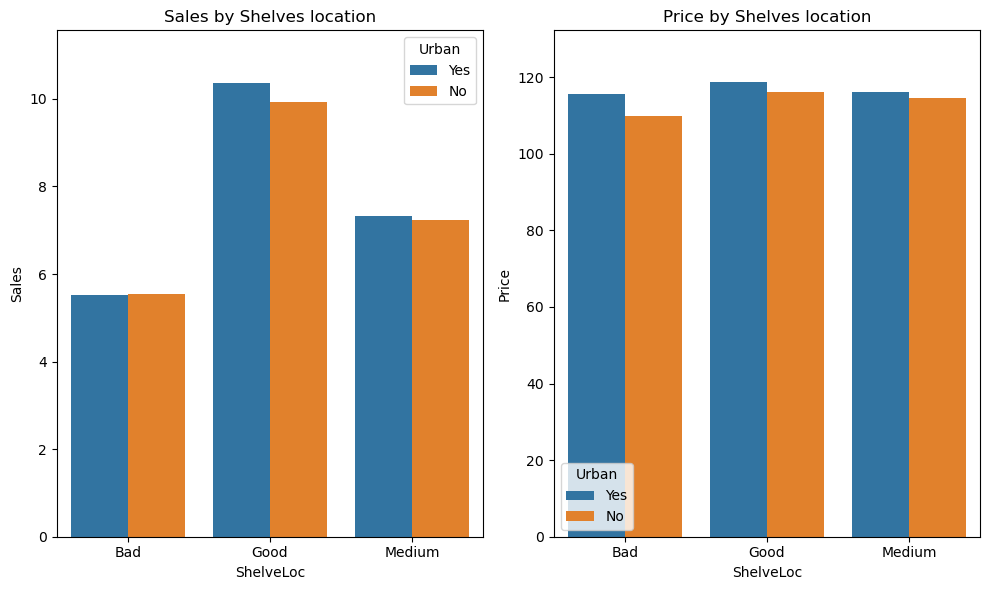

In [14]:
plt.figure (figsize = (10,6))
fig1 = plt.subplot (1,2,1)
sns.barplot(data = data, x= 'ShelveLoc', y = 'Sales', hue = 'Urban', errwidth = 0)
plt.title ("Sales by Shelves location")
plt.xlabel ('ShelveLoc')
plt.ylabel ('Sales')

fig1 = plt.subplot (1,2,2)
sns.barplot(data = data, x= 'ShelveLoc', y = 'Price', hue = 'Urban', errwidth = 0)
plt.title ("Price by Shelves location")
plt.xlabel ('ShelveLoc')
plt.ylabel ('Price')

plt.tight_layout()
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 9/Shelves location.jpg")
plt.show()

### Influence of advertising on Sales

<Figure size 800x600 with 0 Axes>

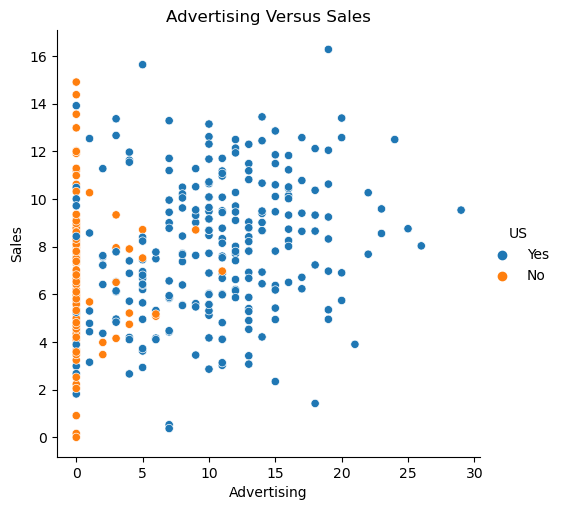

In [15]:
plt.figure (figsize = (8,6))
sns.relplot (data = data, x = 'Advertising', y = 'Sales', hue = 'US')
plt.title("Advertising Versus Sales")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 9/Adv versus Sales.jpg")
plt.show()

## ML Modelling

In [16]:
data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
324,2.66,136,65,4,133,150,Bad,53,13,Yes,Yes
308,9.24,126,80,19,436,126,Medium,52,10,Yes,Yes
237,9.62,151,28,8,499,135,Medium,48,10,Yes,Yes
59,5.21,118,71,4,148,114,Medium,80,13,Yes,No
222,7.49,136,119,6,178,145,Medium,35,13,Yes,Yes
201,5.94,138,83,0,139,134,Medium,54,18,Yes,No
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
186,8.68,120,51,0,93,86,Medium,46,17,No,No
116,5.08,135,75,0,202,128,Medium,80,10,No,No
306,4.78,131,32,1,85,133,Medium,48,12,Yes,Yes


In [17]:
X = data.drop(columns = ['Sales'])

In [18]:
X.sample(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
92,114,113,0,97,125,Medium,29,12,Yes,No
50,99,32,18,341,108,Bad,80,16,Yes,Yes
260,129,117,8,400,101,Bad,36,10,Yes,Yes
182,137,60,4,230,140,Bad,25,13,Yes,No
224,134,82,0,464,141,Medium,48,13,No,No
88,117,42,7,144,111,Medium,62,10,Yes,Yes
54,134,103,13,25,144,Medium,76,17,No,Yes
344,138,80,0,108,126,Good,70,13,No,Yes
123,127,103,0,125,155,Good,29,15,No,Yes
22,128,46,6,497,138,Medium,42,13,Yes,No


In [19]:
for i in data['Sales']:
    if i>=0 and i<=5:
        data['Sales'] = data['Sales'].replace({i: 'Low'})
    elif i>5 and i<=10:
        data['Sales'] = data['Sales'].replace({i: 'Moderate'})
    elif i>10:
        data['Sales'] = data['Sales'].replace({i: 'High'})

In [20]:
y = data['Sales']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1234)

In [22]:
X_train.shape

(340, 10)

In [23]:
X_test.shape

(60, 10)

### Ordinal Encoding for ShelveLoc

In [24]:
oe = OrdinalEncoder(categories = [['Bad', 'Medium', 'Good']])

In [25]:
X_train['ShelveLoc'] = oe.fit_transform(X_train[['ShelveLoc']])

In [26]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
323,107,105,18,428,103,1.0,34,12,Yes,Yes
57,93,91,0,22,117,0.0,75,11,Yes,No
227,113,64,10,68,101,1.0,57,16,Yes,Yes
199,122,88,5,335,126,1.0,64,14,Yes,Yes
138,125,103,12,371,109,1.0,44,10,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
204,155,80,0,237,124,1.0,37,14,Yes,No
53,109,64,13,39,119,1.0,61,17,Yes,Yes
294,148,76,3,126,99,2.0,60,11,Yes,Yes
211,117,118,14,445,120,1.0,32,15,Yes,Yes


In [27]:
X_test ['ShelveLoc'] = oe.transform(X_test[['ShelveLoc']])

### One Hot Encoding for Urban and US columns

In [28]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [29]:
X_train[['Urban', 'US']] = ohe.fit_transform(X_train[['Urban', 'US']])

In [30]:
X_test[['Urban', 'US']] = ohe.transform(X_test[['Urban', 'US']])

### Label encoding on target column (Sales)

In [31]:
le = LabelEncoder()

In [32]:
le.fit_transform(y_train)

array([0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2,

In [33]:
le.transform(y_test)

array([1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2])

### Random Forest Classification

In [34]:
rf = RandomForestClassifier(n_estimators = 500, max_depth = 10, criterion='gini', random_state=2)

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=2)

In [36]:
rf_pred = rf.predict(X_test)

In [37]:
rf_accuracy = accuracy_score (y_test, rf_pred)*100
print (f'Accuracy of the model is: {rf_accuracy:.2f}%')

Accuracy of the model is: 73.33%


In [38]:
rf_report = classification_report(y_test, rf_pred)
print ("--------------Classification Report--------------------")
print (rf_report)

--------------Classification Report--------------------
              precision    recall  f1-score   support

        High       0.73      0.73      0.73        11
         Low       1.00      0.23      0.38        13
    Moderate       0.72      0.92      0.80        36

    accuracy                           0.73        60
   macro avg       0.81      0.62      0.64        60
weighted avg       0.78      0.73      0.70        60



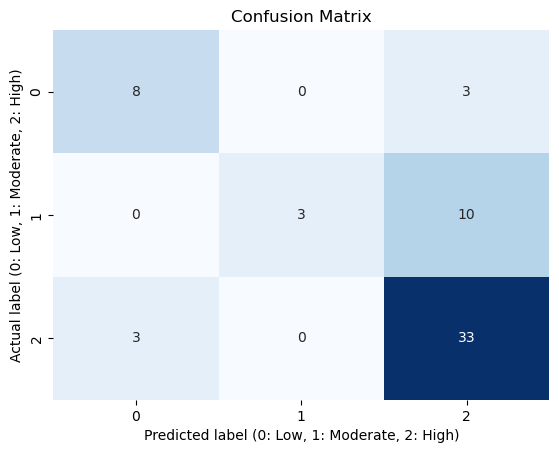

In [39]:
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', cbar = False)
plt.xlabel('Predicted label (0: Low, 1: Moderate, 2: High)')
plt.ylabel('Actual label (0: Low, 1: Moderate, 2: High)')
plt.title("Confusion Matrix")
plt.show()

In [40]:
end = time.time()

In [41]:
print (f'Total execeution time is: {(end-st):.2f} Seconds')

Total execeution time is: 5.31 Seconds
